In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

from tensorflow import keras

In [3]:
pretrained_model = keras.models.load_model('cnn_teeths.keras')


I0000 00:00:1739329883.396671     881 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1739329884.676920     881 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1739329884.676979     881 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1739329884.711920     881 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1739329884.712008     881 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [4]:
pretrained_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 128)  │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,432,311 (85.57 MB)

 Trainable params: 7,477,287 (28.52 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 14,954,576 (57.05 MB)

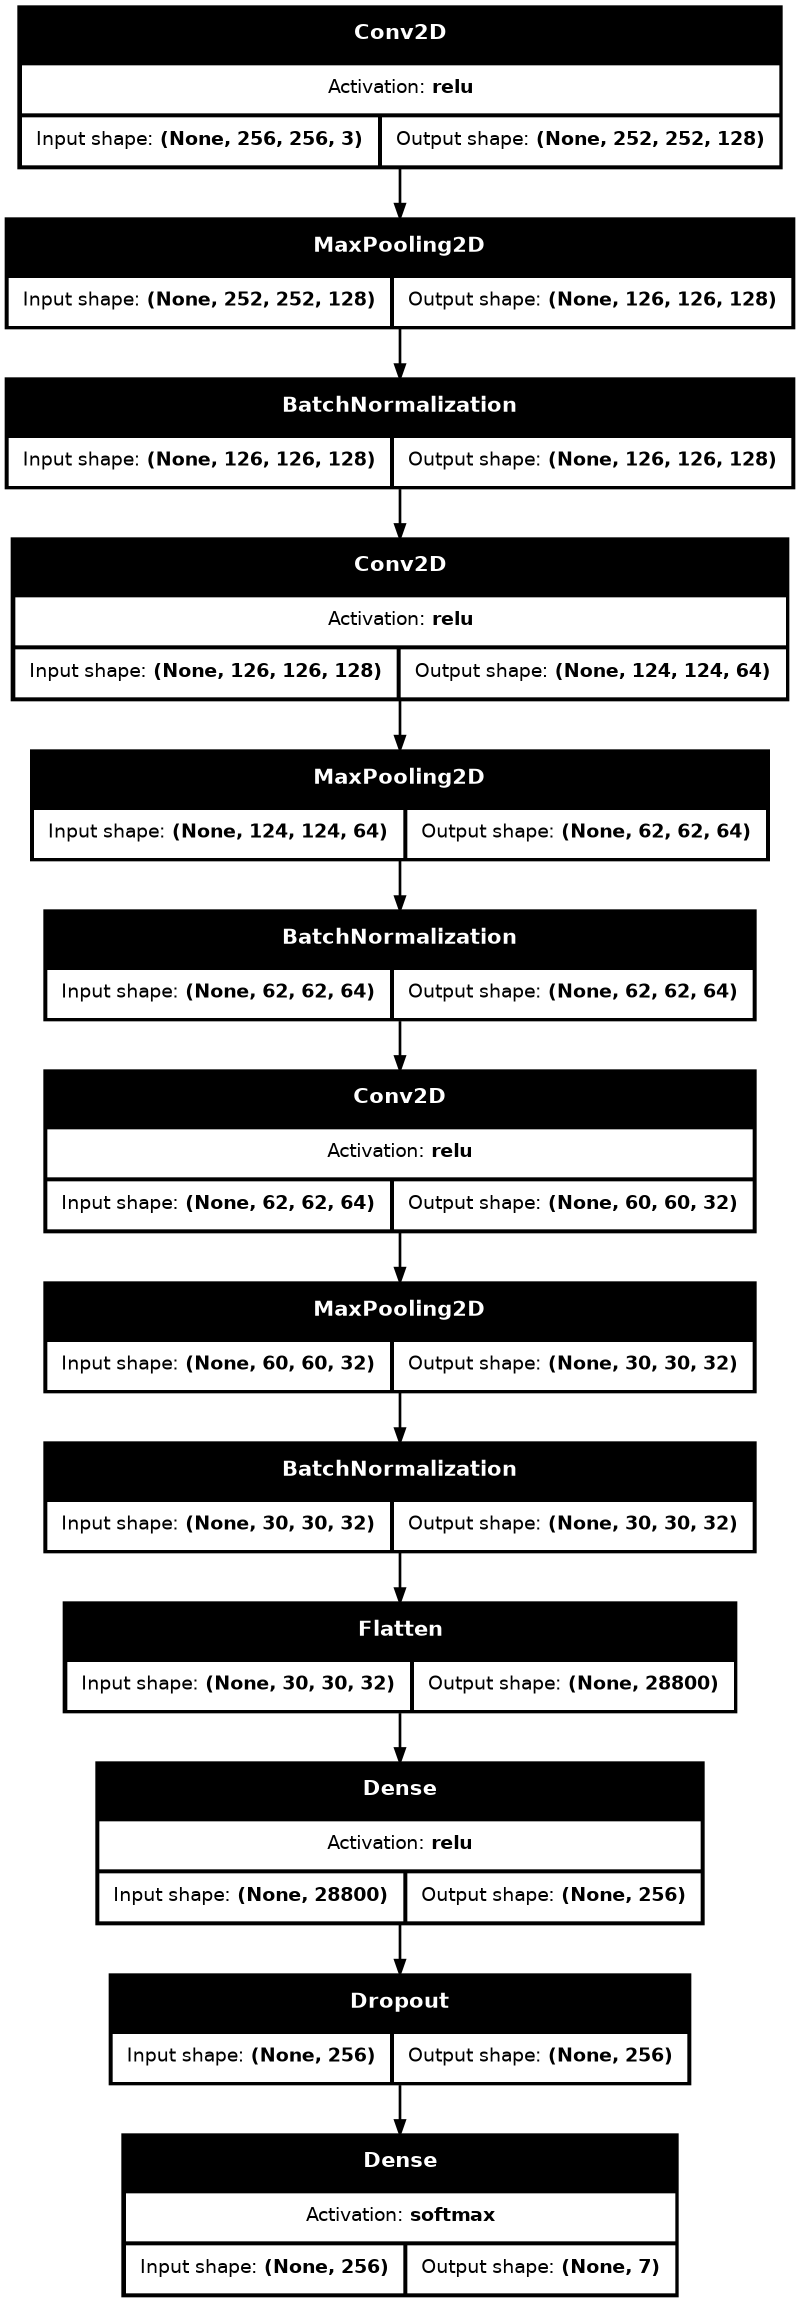

In [7]:
tf.keras.utils.plot_model(
    pretrained_model,
    show_shapes = True,
    show_layer_activations = True,
    dpi=96
)

In [9]:
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = train_datagen.flow_from_directory(
    'Teeth_Dataset/Training/',
    target_size=(256, 256),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    'Teeth_Dataset/Testing',
    target_size=(256, 256),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)

validation_set = test_datagen.flow_from_directory(
    'Teeth_Dataset/Validation/',
    target_size=(256, 256),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [11]:
# Print class names
print("Training Set Class Names:")
print(training_set.class_indices)

print("Test Set Class Names:")
print(test_set.class_indices)

print("Test Set Class Names:")
print(validation_set.class_indices)

Training Set Class Names:
{'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}
Test Set Class Names:
{'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}
Test Set Class Names:
{'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}


In [12]:
labels = {value: key for key, value in training_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : CaS
1 : CoS
2 : Gum
3 : MC
4 : OC
5 : OLP
6 : OT


# Fine-tuning

In [13]:
optimizer = Adam(learning_rate=0.001)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (usually validation loss)
    factor=0.1,          # Factor by which to reduce the learning rate
    patience=10,         # Number of epochs with no improvement before reducing
    min_lr=0.00001       # Minimum learning rate
)

In [14]:
# Compile the model
pretrained_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [21]:
pretrained_model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [24]:
len(pretrained_model.layers)

13

# Traing last 5 layers

In [22]:
for layer in pretrained_model.layers[:8]: # Freeze layers of the base model
    layer.trainable = False

In [23]:
# fine-tuning the model
history = pretrained_model.fit(
    training_set,
    validation_data=validation_set,
    verbose=2,
    callbacks=[reduce_lr],
    epochs=100
)

Epoch 1/100
97/97 - 17s - 171ms/step - accuracy: 0.7729 - loss: 0.6584 - val_accuracy: 0.7461 - val_loss: 0.8628 - learning_rate: 0.0010
Epoch 2/100
97/97 - 16s - 170ms/step - accuracy: 0.7674 - loss: 0.6830 - val_accuracy: 0.8745 - val_loss: 0.4049 - learning_rate: 0.0010
Epoch 3/100
97/97 - 16s - 169ms/step - accuracy: 0.7629 - loss: 0.7116 - val_accuracy: 0.8658 - val_loss: 0.4898 - learning_rate: 0.0010
Epoch 4/100
97/97 - 16s - 170ms/step - accuracy: 0.7681 - loss: 0.6990 - val_accuracy: 0.7510 - val_loss: 0.8750 - learning_rate: 0.0010
Epoch 5/100
97/97 - 16s - 164ms/step - accuracy: 0.7920 - loss: 0.6435 - val_accuracy: 0.8813 - val_loss: 0.3540 - learning_rate: 0.0010
Epoch 6/100
97/97 - 16s - 167ms/step - accuracy: 0.7920 - loss: 0.6100 - val_accuracy: 0.6946 - val_loss: 2.1200 - learning_rate: 0.0010
Epoch 7/100
97/97 - 16s - 168ms/step - accuracy: 0.7992 - loss: 0.5915 - val_accuracy: 0.6712 - val_loss: 2.1641 - learning_rate: 0.0010
Epoch 8/100
97/97 - 16s - 165ms/step - ac

In [26]:
loss, accuracy = pretrained_model.evaluate(test_set, batch_size=32)
print(f'accuracy = {accuracy}, loss= {loss}')

/home/font/LearnDL/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9826 - loss: 0.0724
accuracy = 0.9795719981193542, loss= 0.08502502739429474


In [27]:
predictions = pretrained_model.predict(test_set)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [28]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_set.classes
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

         CaS       0.99      0.98      0.98       160
         CoS       1.00      1.00      1.00       149
         Gum       0.98      0.99      0.99       120
          MC       0.98      0.97      0.97       180
          OC       0.95      0.97      0.96       108
         OLP       0.98      0.96      0.97       180
          OT       0.98      0.99      0.98       131

    accuracy                           0.98      1028
   macro avg       0.98      0.98      0.98      1028
weighted avg       0.98      0.98      0.98      1028



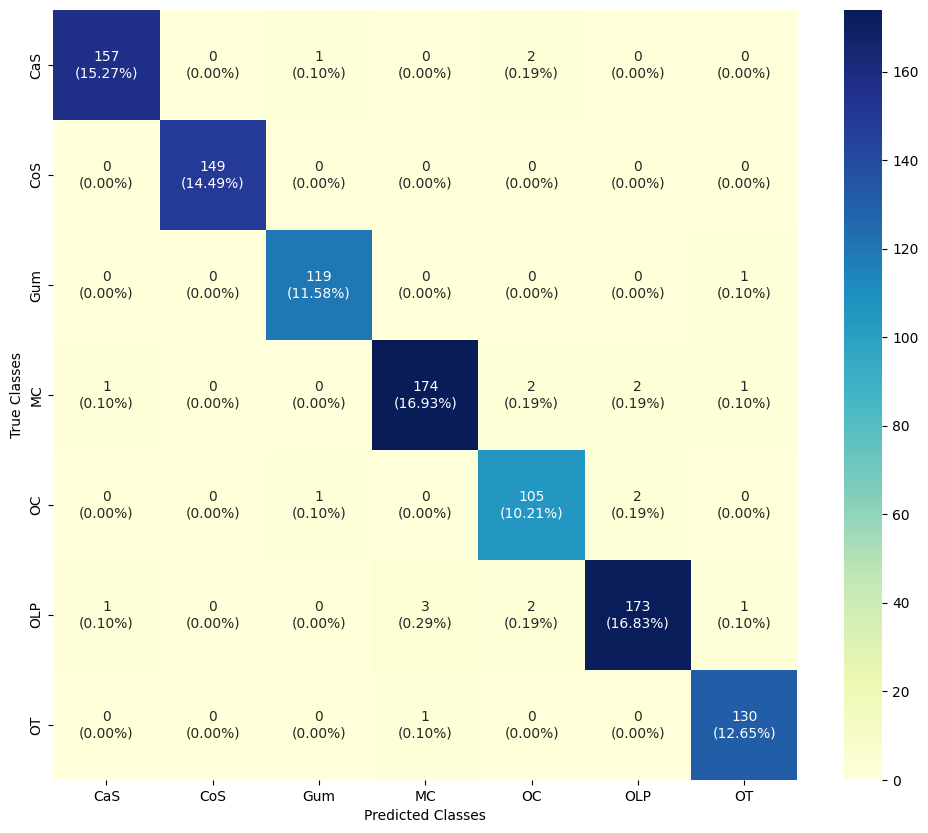

In [29]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(7, 7)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

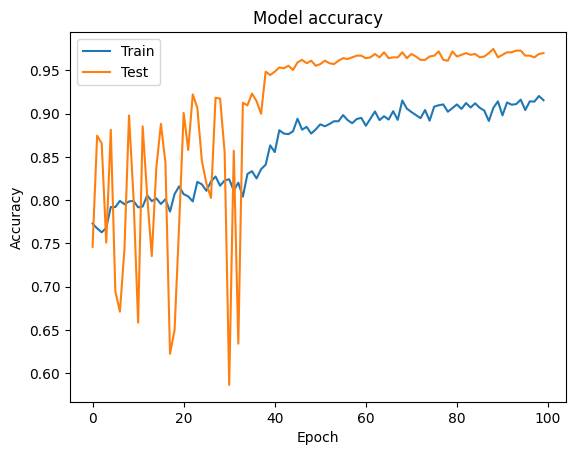

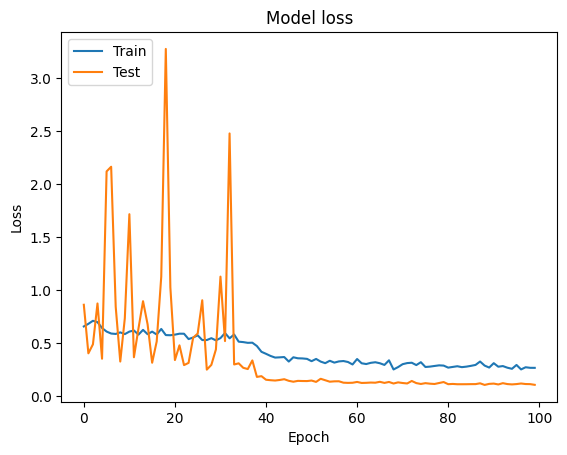

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [32]:
predictions = pretrained_model.predict(training_set)
#predictions = cnn.predict(test_set)
predicted_classes = np.argmax(predictions, axis=-1)

true_classes_index = test_set.classes

code_int = {0 : 'CaS', 1 : 'CoS', 2 : 'Gum', 3 : 'MC', 4 : 'OC', 5 : 'OLP', 6 : 'OT'}

num_images = len(test_set.filenames)
num_images = len(test_set.filenames)

97/97 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step


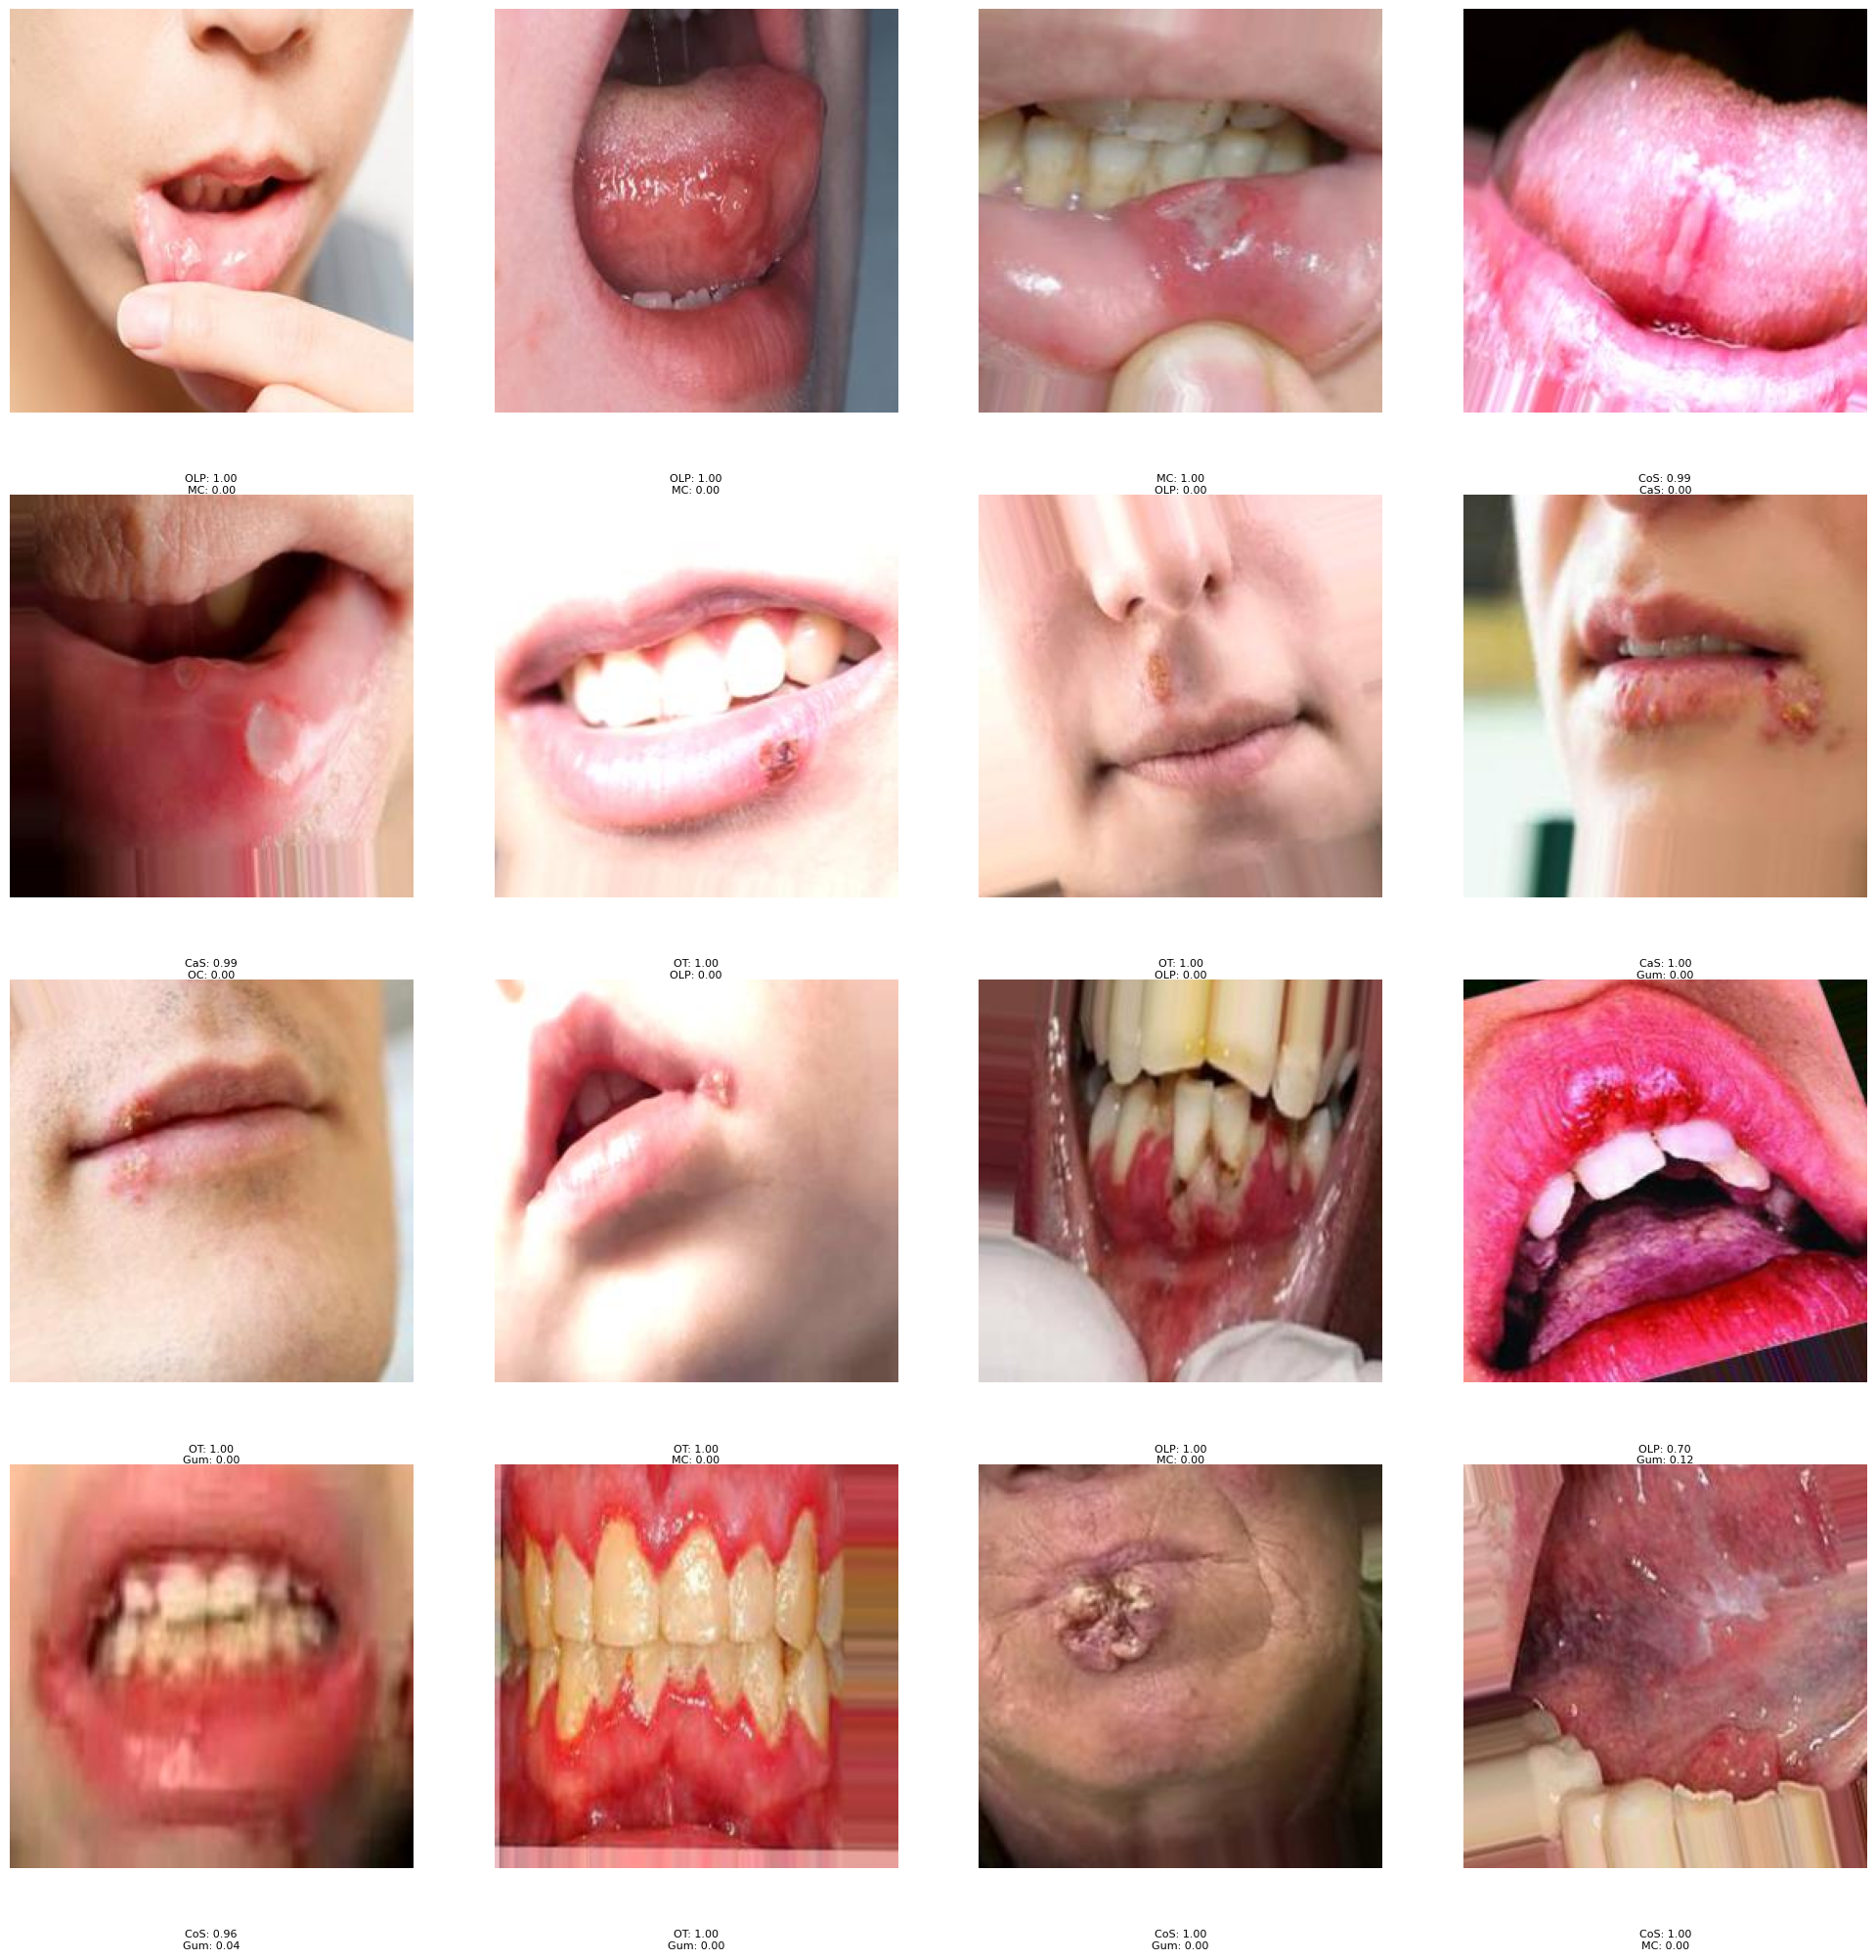

In [33]:

def get_top_n_predictions(predictions, n=2):
    top_n_indices = np.argsort(predictions)[-n:][::-1]
    return [(code_int[i], predictions[i]) for i in top_n_indices]

# Display images with their predicted classes and probabilities
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), tight_layout=True)  # Increased figure size
for i, ax in enumerate(axs.flat):
    if i >= num_images:
        break

    img = test_set[i][0]  # Get the i-th image
    img = img[0] if img.ndim == 4 else img
    # Remove batch dimension if present
    img = img.squeeze() if img.ndim == 4 else img
    
    ax.imshow(img, cmap=None)  # Use cmap=None for RGB images
    ax.axis('off')
    
    # Get top 3 predictions
    top_predictions = get_top_n_predictions(predictions[i])
    
    # Create a string with top 3 predictions and their probabilities
    pred_string = "\n".join([f"{class_name}: {prob:.2f}" for class_name, prob in top_predictions])
    
    # Add text below the image
    ax.text(0.5, -0.2, pred_string, size=8, ha="center", transform=ax.transAxes)

plt.show()

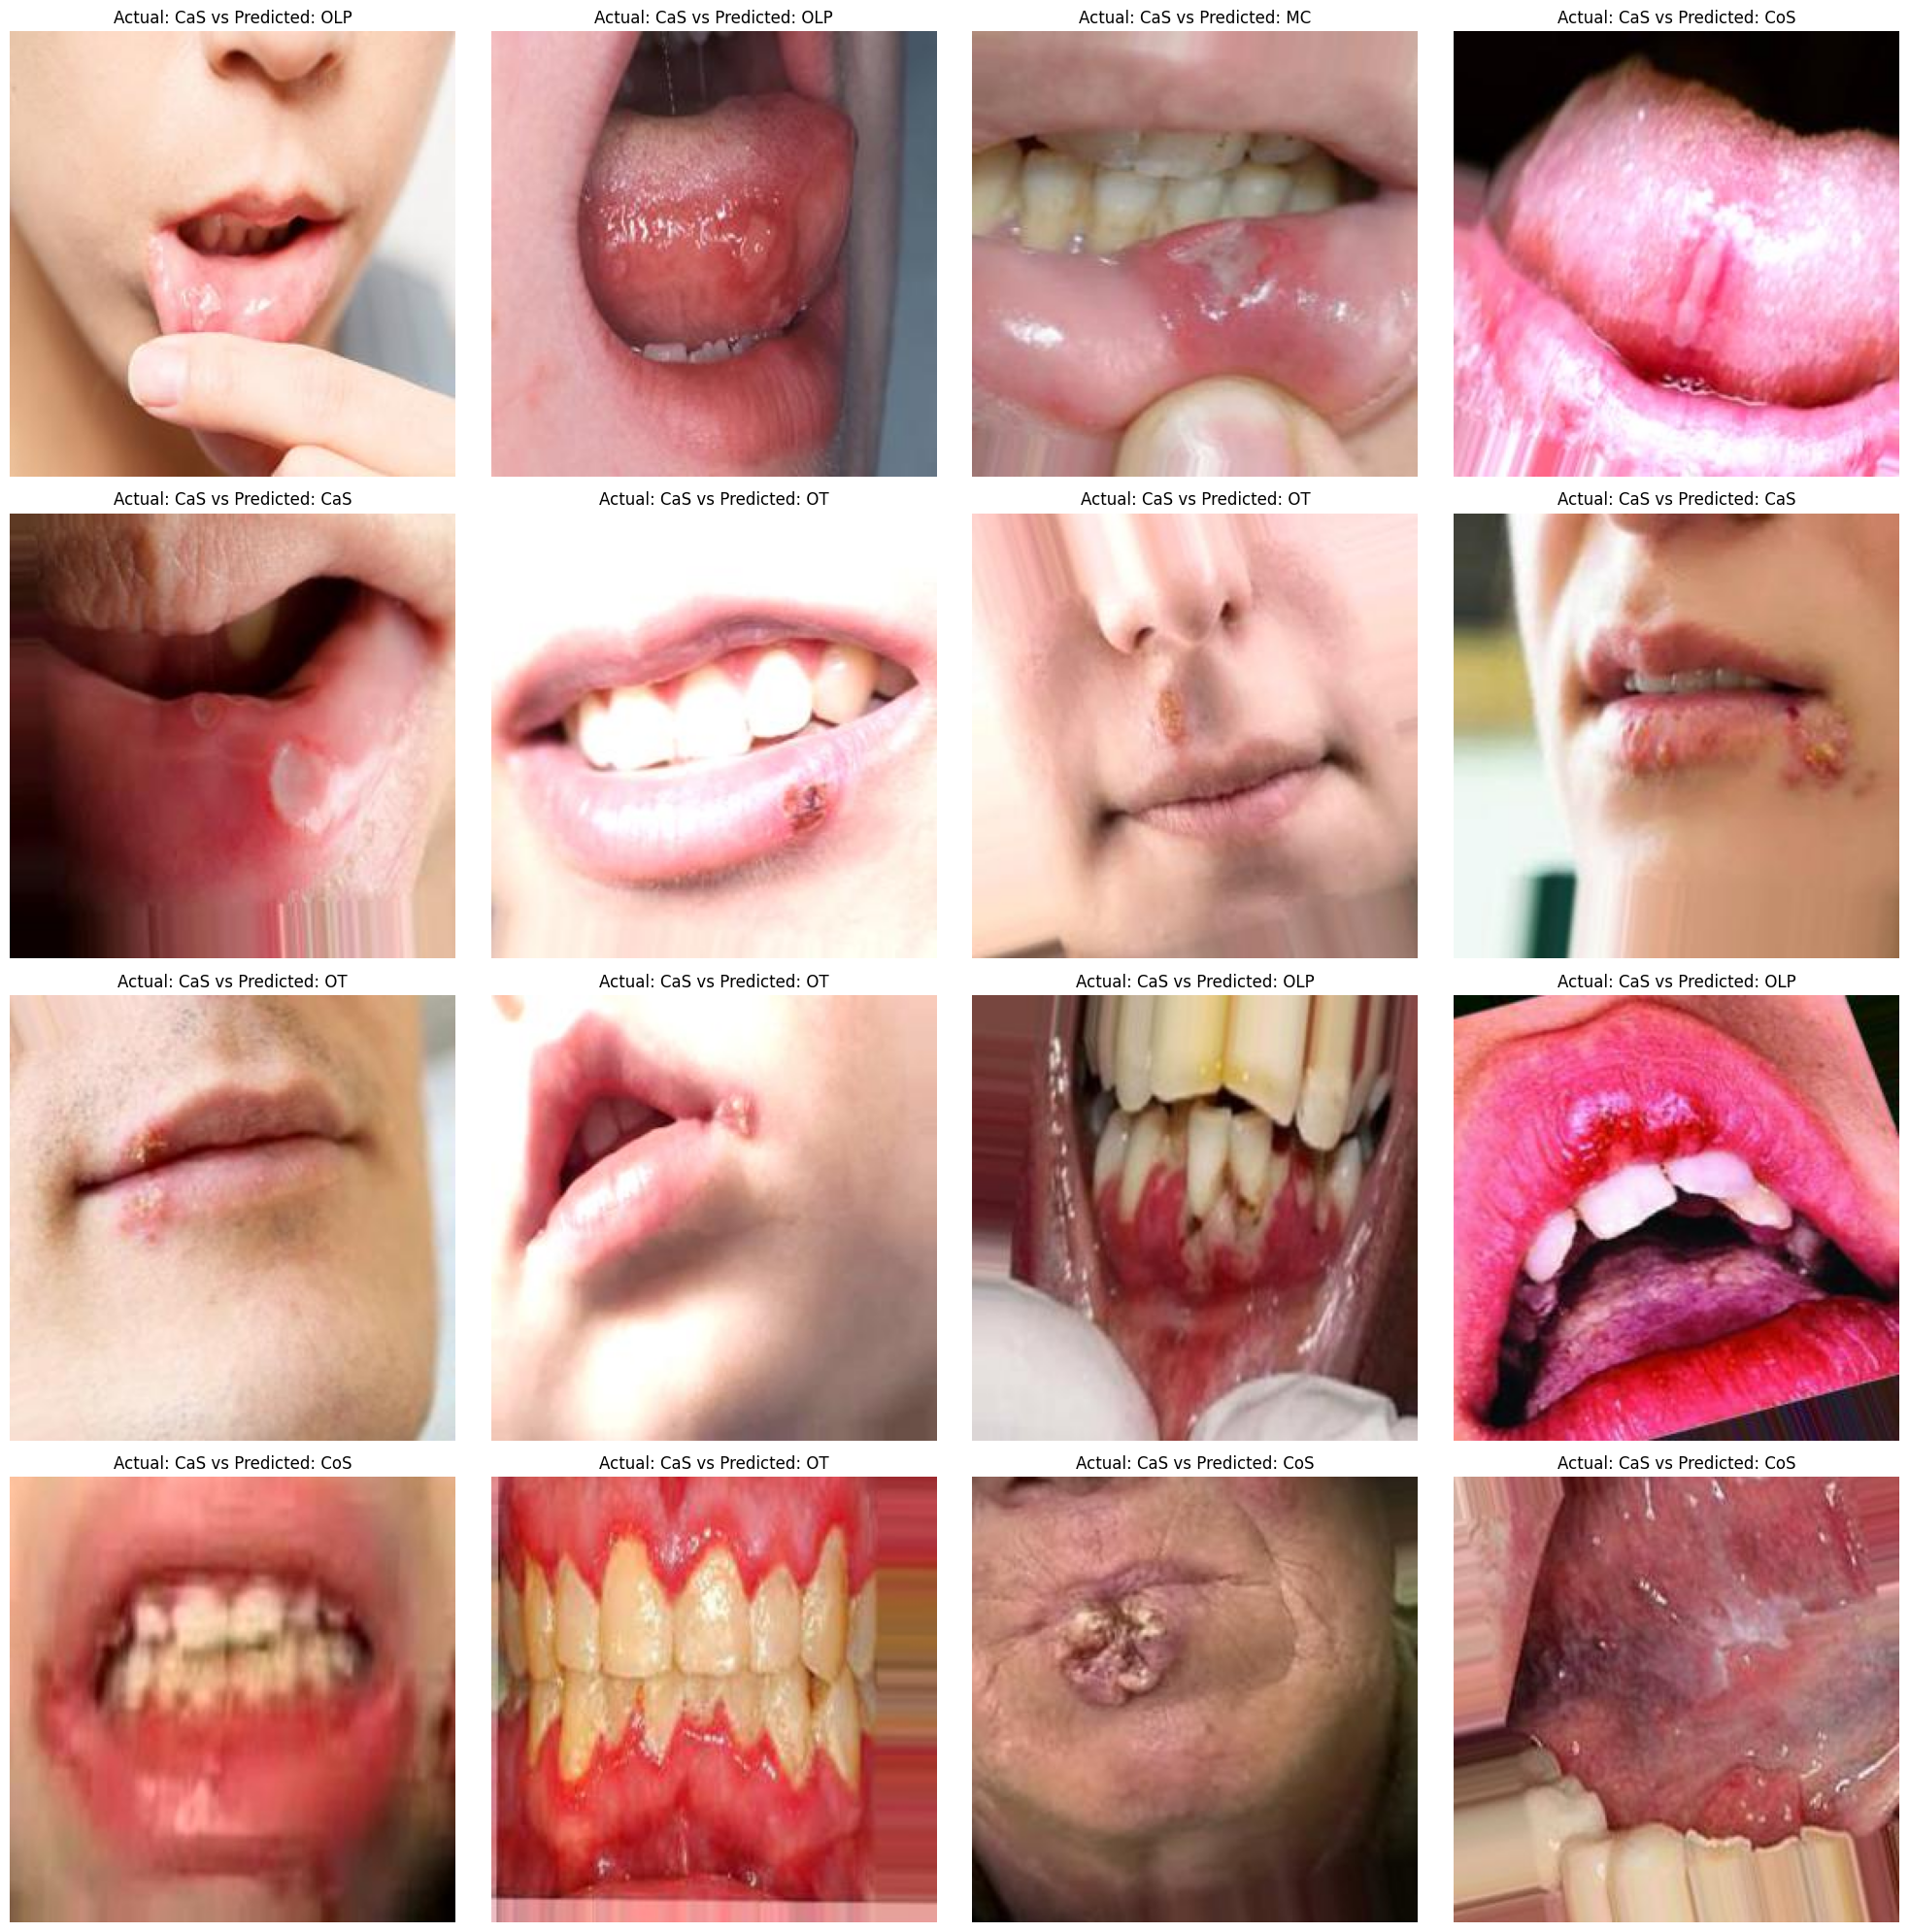

In [34]:
# Display images with their predicted classes
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), tight_layout=True)  # Adjust nrows and ncols as needed
for i, ax in enumerate(axs.flat):
    if i >= num_images:
        break

    img = test_set[i][0]  # Get the i-th image
    img = img[0] if img.ndim == 4 else img
    # Remove batch dimension if present
    img = img.squeeze() if img.ndim == 4 else img
    
    ax.imshow(img, cmap=None)  # Use cmap=None for RGB images
    ax.set_title(f'Actual: {code_int[true_classes_index[i]]} vs Predicted: {code_int[predicted_classes[i]]}')
    ax.axis('off')

plt.show()

In [35]:
# Save the model
pretrained_model.save('fine_tuned_cnn_teeths.keras')